In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2019-05-26 17:39:23--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com... 2a00:1450:4010:c0b::80, 173.194.222.128
Connecting to storage.googleapis.com|2a00:1450:4010:c0b::80|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: '/tmp/irish-lyrics-eof.txt'

/tmp/irish-lyrics-e 100%[=====================>]  67.35K  --.-KB/s   in 0.001s 

2019-05-26 17:39:23 (94.9 MB/s) - '/tmp/irish-lyrics-eof.txt' saved [68970/68970]



In [8]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(list(tokenizer.word_index.items())[:10])
print(total_words)

[('the', 1), ('and', 2), ('i', 3), ('to', 4), ('a', 5), ('of', 6), ('my', 7), ('in', 8), ('me', 9), ('for', 10)]
2690


In [9]:

input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [10]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [11]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [12]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [13]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [14]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Train on 12038 samples
Epoch 1/100
12038/12038 [==============================] - 10s 792us/sample - loss: 6.5978 - accuracy: 0.0819
Epoch 2/100
12038/12038 [==============================] - 7s 563us/sample - loss: 5.6403 - accuracy: 0.1214
Epoch 3/100
12038/12038 [==============================] - 7s 561us/sample - loss: 4.7148 - accuracy: 0.1785
Epoch 4/100
12038/12038 [==============================] - 7s 563us/sample - loss: 3.7568 - accuracy: 0.2587
Epoch 5/100
12038/12038 [==============================] - 7s 558us/sample - loss: 3.0197 - accuracy: 0.3598
Epoch 6/100
12038/12038 [==============================] - 7s 565us/sample - loss: 2.7338 - accuracy: 0.4074
Epoch 7/100
12038/12038 [==============================] - 7s 550us/sample - loss: 2.0077 - accuracy: 0.5281
Epoch 8/100
12038/12038 [==============================] - 7s 556us/sample - loss: 1.6083 - accuracy: 0.6188
Epoch 9/100
12038/12038 [==============================] - 7s 557us/sample - loss: 1.4140 - accuracy: 0.

12038/12038 [==============================] - 7s 553us/sample - loss: 0.9117 - accuracy: 0.7697
Epoch 76/100
12038/12038 [==============================] - 7s 557us/sample - loss: 0.9572 - accuracy: 0.7578
Epoch 77/100
12038/12038 [==============================] - 7s 553us/sample - loss: 0.9381 - accuracy: 0.7589
Epoch 78/100
12038/12038 [==============================] - 7s 548us/sample - loss: 0.9247 - accuracy: 0.7668
Epoch 79/100
12038/12038 [==============================] - 7s 555us/sample - loss: 1.0221 - accuracy: 0.7464
Epoch 80/100
12038/12038 [==============================] - 7s 553us/sample - loss: 1.0155 - accuracy: 0.7490
Epoch 81/100
12038/12038 [==============================] - 7s 552us/sample - loss: 1.0354 - accuracy: 0.7431
Epoch 82/100
12038/12038 [==============================] - 7s 552us/sample - loss: 1.0190 - accuracy: 0.7461
Epoch 83/100
12038/12038 [==============================] - 7s 554us/sample - loss: 0.9686 - accuracy: 0.7601
Epoch 84/100
12038/1203

In [15]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.style.use('seaborn')
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

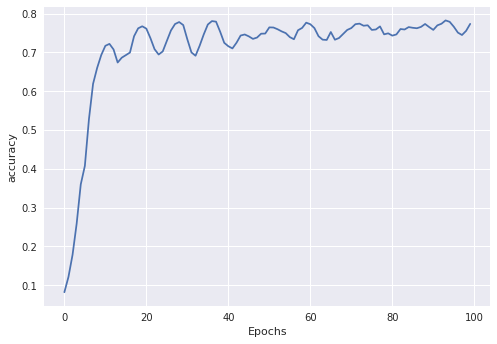

In [16]:
plot_graphs(history, 'accuracy')


In [17]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this round the room heavy see again kathleen seen is gone by single ball right right leg grow poisoning are sacked are war is gone i hired a high calling calling yore i lovd best only another i love best tune truth gone tempest love tempest flood back else to sweet athy tempest love of my own bride and waxes kind true else ill expire courting else now is gone across the floor are calling or writin god had right damsel with spancil hill hill de rah nor autumn gone gone gone gone across i care stand from your hat and
